# Woche 8: Visualisierung - Airbnb Berlin

**DataPy - WiSe25/26**

Explorative Datenanalyse mit bereinigten Daten aus Woche 7

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Setup komplett")

Setup komplett


In [3]:
# Laden der bereinigten Daten aus Woche 7
df = pd.read_csv('airbnb_berlin_cleaned.csv')
print(f"Geladen: {df.shape}")
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'airbnb_berlin_cleaned.csv'

## Teil 1: Preisverteilung

In [ ]:
import os # zum Speichern von figures!

# --- Ordner 'figures' erstellen, falls er noch nicht existiert. wollen hier die plots speichern ---
os.makedirs("figures", exist_ok=True)

fig, ax = plt.subplots(1, 3, figsize=(16, 5)) #data plots anlegen 1 Zeile, 3 Spalten für 3 figures

# Plot 1: Alle Preise
ax[0].hist(df['price_num'], bins=50, edgecolor='black')
ax[0].set_xlabel('Preis')
ax[0].set_title('Alle Preise')

# Plot 2: Preise < 300
df_f = df[df['price_num'] < 300]
ax[1].hist(df_f['price_num'], bins=50, color='orange', edgecolor='black')
ax[1].set_xlabel('Preis')
ax[1].set_title('Preise < 300')

# Plot 3: Boxplot
ax[2].boxplot(df_f['price_num'])
ax[2].set_ylabel('Preis')
ax[2].set_title('Boxplot')

plt.tight_layout()

# --- Gemeinsame Figure speichern ---
fig.savefig("figures/all_plots.png", dpi=300, bbox_inches="tight")

# --- Anzeigen der kombinierten Figure ---
plt.show()

# --- Statistiken ---
print(f"Durchschnitt: ${df['price_num'].mean():.2f}")
print(f"Median: ${df['price_num'].median():.2f}")

## Teil 2: Preise nach Zimmertyp

In [1]:
avg = df.groupby('room_type')['price_num'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(range(len(avg)), avg.values)
plt.xticks(range(len(avg)), avg.index, rotation=45, ha='right')
plt.ylabel('Durchschnittspreis')
plt.title('Preise nach Zimmertyp')
plt.tight_layout()
plt.show()

#in unserem zuvor erstellten figures folder speichern
plt.savefig("figures/avg_price_by_room_type.png", dpi=300, bbox_inches="tight")

print(avg)

NameError: name 'df' is not defined

> wir sehen es gibt einen 'möglichen' Ausreiser, nämlich ein Hotelzimmer mit 5532$. (Achtung: es könnte aber dennoch ein realer Preis z.B. in einem Luxushotel sein). Wenn man diesen 'Ausreiser' ignoriert, sind laut Visualisierung ganze Wohnungen/Apt. teurer als Einzel- und WG-Zimmer, was ja auch sinnvoll ist.

## Teil 3: Top Stadtteile

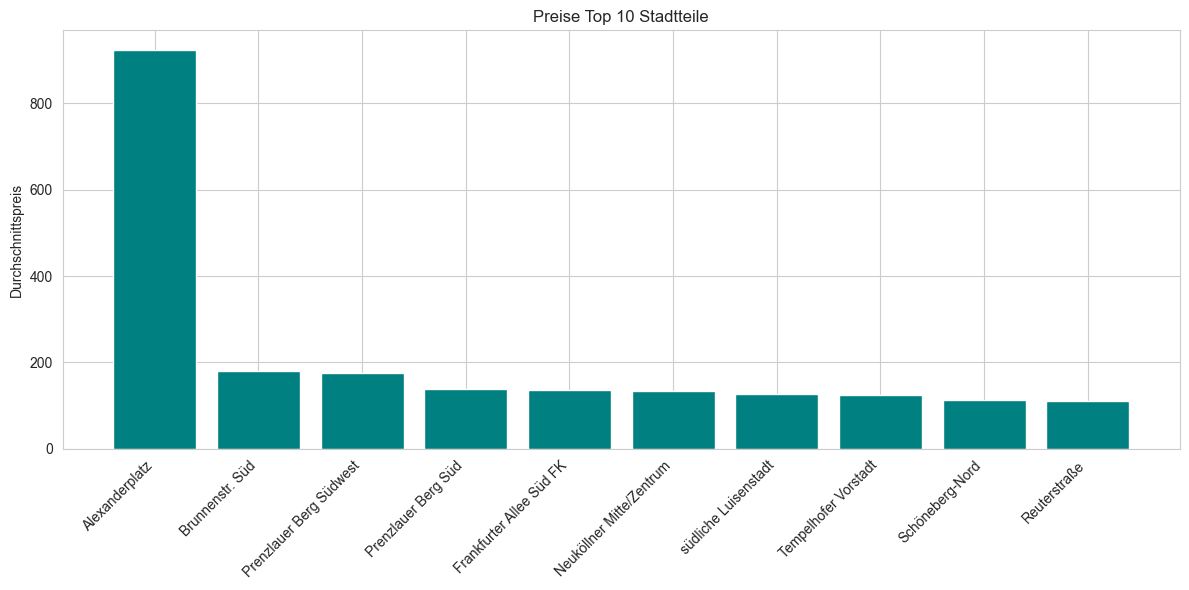

In [29]:
top = df['neighbourhood_cleansed'].value_counts().head(10).index
df_top = df[df['neighbourhood_cleansed'].isin(top)]
avg_hood = df_top.groupby('neighbourhood_cleansed')['price_num'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(len(avg_hood)), avg_hood.values, color='teal')
plt.xticks(range(len(avg_hood)), avg_hood.index, rotation=45, ha='right')
plt.ylabel('Durchschnittspreis')
plt.title('Preise Top 10 Stadtteile')
plt.tight_layout()
plt.show()

> wir nehmen 10 Stadtteile mit den meisten Listings und vergleichen die Durchschnittspreise. So sehen wir: Welche Berliner Bezirke sind am teuersten? Zum Beispiel ist Mitte (bspw. Nähe Alexanderplatz) oft teurer als Randbezirke -so wie der Visualisierung entnommen werden kann!

## Teil 4: Bewertungen

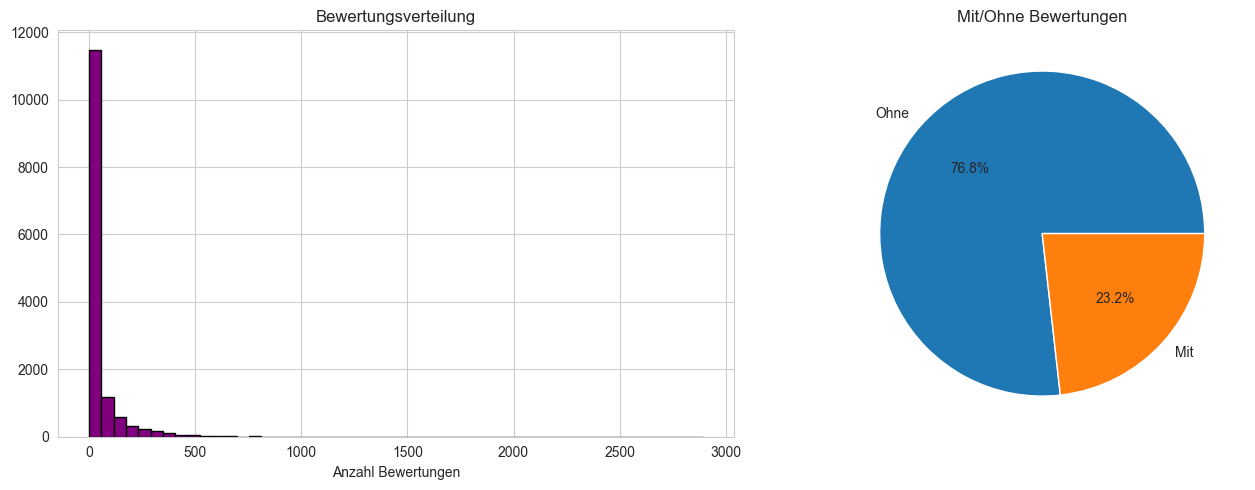

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(df['number_of_reviews'], bins=50, color='purple', edgecolor='black')
ax[0].set_xlabel('Anzahl Bewertungen')
ax[0].set_title('Bewertungsverteilung')

has_rev = (df['number_of_reviews'] > 0).value_counts()
ax[1].pie(has_rev.values, labels=['Ohne', 'Mit'], autopct='%1.1f%%')
ax[1].set_title('Mit/Ohne Bewertungen')
plt.tight_layout()



# --- Beide Plots zusammen speichern ---
fig.savefig("figures/reviews_overview.png", dpi=300, bbox_inches="tight")

# --- Einzelplots separat speichern ---

# Histogramm einzeln
plt.figure(figsize=(7, 5))
plt.hist(df['number_of_reviews'], bins=50, color='purple', edgecolor='black')
plt.xlabel('Anzahl Bewertungen')
plt.title('Bewertungsverteilung')
plt.tight_layout()
plt.savefig("figures/reviews_distribution.png", dpi=300, bbox_inches="tight")
plt.close()

# Torten-Diagramm (pie) einzeln
plt.figure(figsize=(6, 6))
plt.pie(has_rev.values, labels=['Ohne', 'Mit'], autopct='%1.1f%%')
plt.title('Mit/Ohne Bewertungen')
plt.tight_layout()
plt.savefig("figures/reviews_with_without.png", dpi=300, bbox_inches="tight")
plt.close()
plt.show()

> Zwei Visualisierungen zu Bewertungen:
> - Histogramm: Wie verteilen sich die Bewertungszahlen? Haben die meisten Listings wenige oder viele Reviews?
> - Pie Chart: Wie viel Prozent der Listings haben überhaupt Bewertungen?

> Erkenntnis: Viele Listings haben nur wenige oder gar keine Bewertungen.Wichtig: Pie Chart ist intuitiver (visuell besser). ODER?

## Teil 5: Preis vs Bewertungen

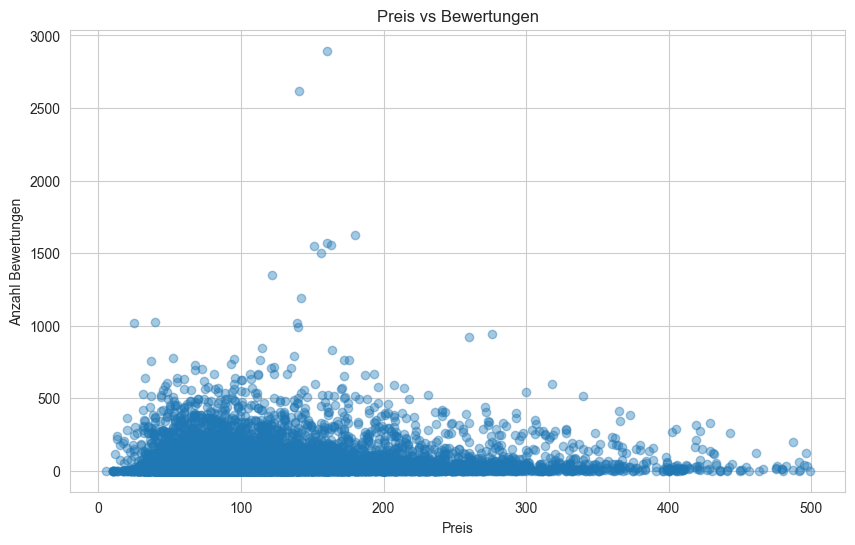

Korrelation: -0.022


<Figure size 1200x600 with 0 Axes>

In [7]:
df_plot = df[df['price_num'] < 500]

#Streu-Diagramm
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['price_num'], df_plot['number_of_reviews'], alpha=0.4)
plt.xlabel('Preis')
plt.ylabel('Anzahl Bewertungen')
plt.title('Preis vs Bewertungen')
plt.show()

corr = df['price_num'].corr(df['number_of_reviews']) #Korrelation ermitteln

plt.savefig("figures/price_vs_reviews.png", dpi=300, bbox_inches="tight")
print(f"Korrelation: {corr:.3f}")

> Gibt es einen Zusammenhang zwischen Preis und Bewertung? Werden teurere Unterkünfte mehr bewertet? Wir berechnen und visualisieren die Korrelation. 
Erkenntnis: die Korrelation ist schwach negativ, d.h. Günstigere Listings werden etwas häufiger gebucht und bewertet.

## Teil 6: Gäste vs Preis

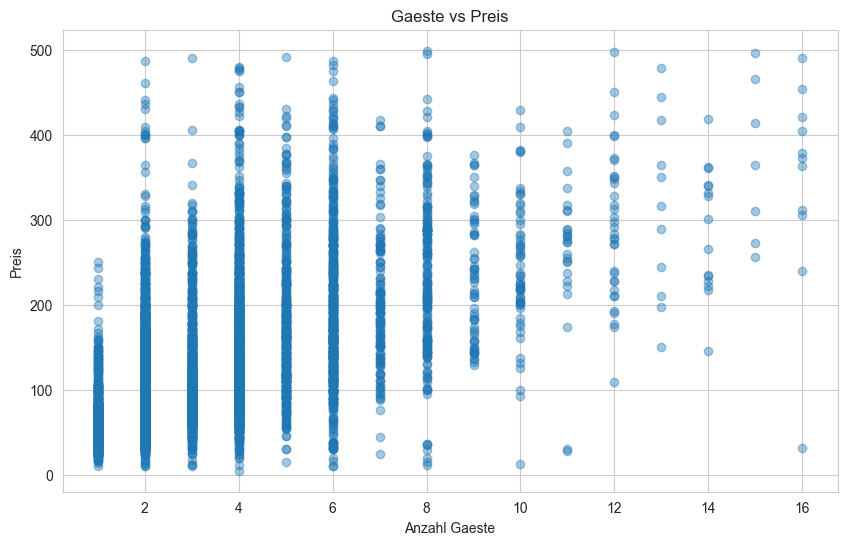

Korrelation: 0.058


In [31]:
df_plot = df[df['price_num'] < 500]

plt.figure(figsize=(10, 6))
plt.scatter(df_plot['accommodates'], df_plot['price_num'], alpha=0.4)

plt.xlabel('Anzahl Gaeste')
plt.ylabel('Preis')
plt.title('Gaeste vs Preis')
plt.show()


> Kosten größere Unterkünfte (für mehr Gäste) auch mehr? Erwartung: Ja, eine Wohnung für 6 Personen sollte teurer sein als für 2. Wir prüfen, ob das visuell sichtbar ist.

## Teil 7: Property Types

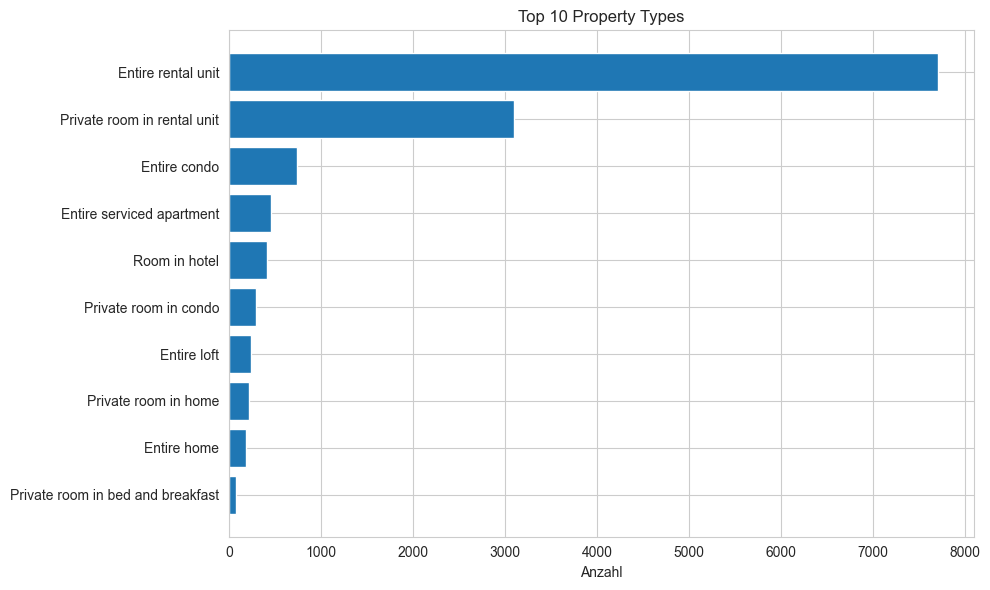

In [9]:
top_prop = df['property_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_prop)), top_prop.values)
plt.yticks(range(len(top_prop)), top_prop.index)
plt.xlabel('Anzahl')
plt.title('Top 10 Property Types')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

> Ein horizontales Balkendiagramm zeigt die 10 häufigsten Unterkunftstypen: Apartments, Lofts, Häuser etc. So sehen wir: Was für Unterkünfte gibt es in Berlin am häufigsten? Nämlich ganze Wohnung

## Teil 8: Geografische Verteilung

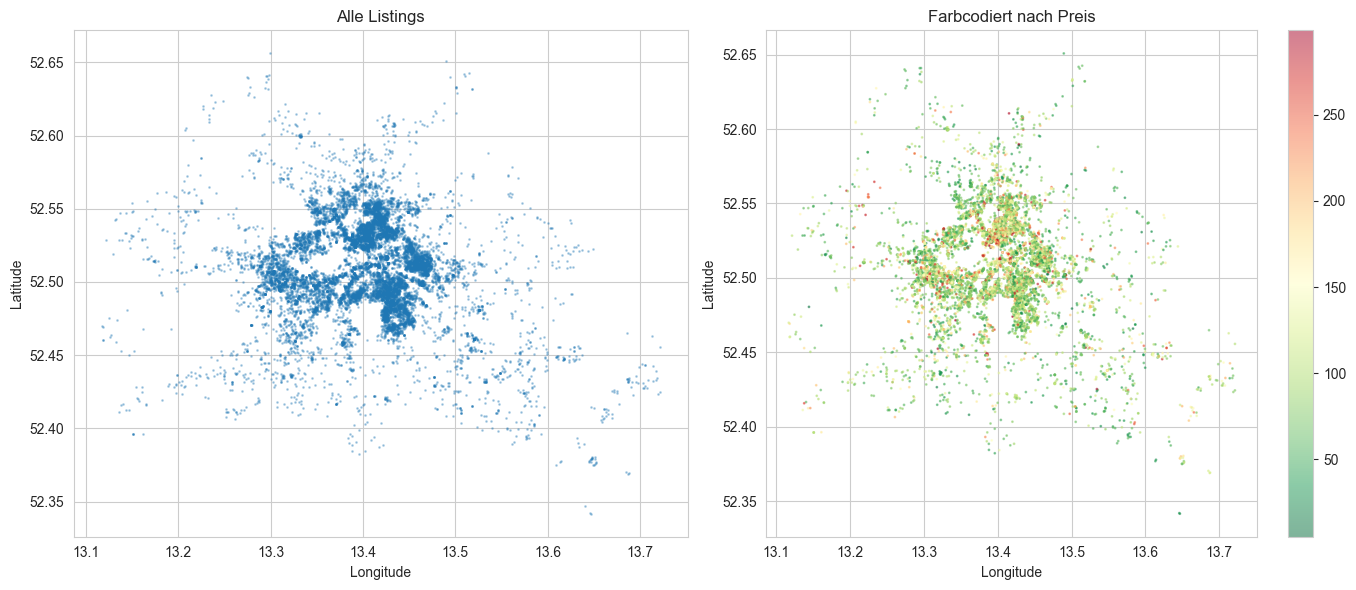

In [10]:
if 'latitude' in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(df['longitude'], df['latitude'], alpha=0.3, s=1)
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('Alle Listings')
    
    #farbcodiert nach Preis (<300)
    df_plot = df[df['price_num'] < 300]
    scatter = ax[1].scatter(df_plot['longitude'], df_plot['latitude'],
                            c=df_plot['price_num'], cmap='RdYlGn_r', alpha=0.5, s=1)
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('Farbcodiert nach Preis')
    plt.colorbar(scatter, ax=ax[1])
    
    plt.tight_layout()
    
    # beide plots gemeinsam speichern 
    fig.savefig("figures/map_overview.png", dpi=300, bbox_inches="tight")
    
    plt.show()

> Zwei Scatter Plots auf einer Karte von Berlin (Längen- und Breitengrad):
> - Links: Alle Listings als Punkte - zeigt wo Unterkünfte konzentriert sind (z.B. Stadtzentrum)
> - Rechts: Gleich, aber farbcodiert nach Preis (rot=teuer, grün=günstig)

> --> So sehen wir: Welche Gegenden sind teuer? Wo gibt es viele günstige Unterkünfte?

## Zusammenfassung

In [11]:
print("ERKENNTNISSE AIRBNB BERLIN")
print("="*50)

print(f"Durchschnittspreis: ${df['price_num'].mean():.2f}")
print(f"Median: ${df['price_num'].median():.2f}")

print("\nAnzahl Zimmertypen:")
for rt, cnt in df['room_type'].value_counts().items():
    pct = (cnt/len(df))*100
    print(f"  {rt}: {cnt} ({pct:.1f}%)")

with_rev = (df['number_of_reviews'] > 0).sum()
print(f"\nMit Bewertungen: {with_rev} ({with_rev/len(df)*100:.1f}%)")

ERKENNTNISSE AIRBNB BERLIN
Durchschnittspreis: $201.24
Median: $104.00

Anzahl Zimmertypen:
  Entire home/apt: 9663 (67.7%)
  Private room: 4399 (30.8%)
  Hotel room: 110 (0.8%)
  Shared room: 102 (0.7%)

Mit Bewertungen: 10960 (76.8%)
